# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%reload_ext pycodestyle_magic

In [2]:
#%%pycodestyle
from sklearn.metrics import pairwise_distances


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        # Your Code Here
        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0],
                                                size=self.k)]
        elif self.init == 'k-means':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for i in range(1, self.k):
                self.centroids = np.nan_to_num(self.centroids)
                distances = np.min(pairwise_distances(X,
                                                      self.centroids[:i],
                                                      self.metric),
                                   axis=1) ** 2
                probabilities = distances / np.sum(distances)
                self.centroids[i] = X[np.random.choice(
                    range(X.shape[0]), p=probabilities)]
        for i in range(self.max_iter):
            next_centroids = self.centroids
            self.labels = np.argmin(pairwise_distances(X, self.centroids,
                                                       metric=self.metric),
                                    axis=1)
            next_centroids = np.array([X[self.labels == j].mean(axis=0)
                                       for j in range(self.k)])
            if np.all(self.centroids == next_centroids):
                break
            self.centroids = next_centroids
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        return np.argmin(pairwise_distances(X, self.centroids,
                                            metric=self.metric), axis=1)


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=100):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0],
                                                size=self.k)]
        elif self.init == 'k-means':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for i in range(1, self.k):
                self.centroids = np.nan_to_num(self.centroids)
                distances = np.min(pairwise_distances(X,
                                                      self.centroids[:i],
                                                      self.metric),
                                   axis=1) ** 2
                probabilities = distances / np.sum(distances)
                self.centroids[i] = X[np.random.choice(
                    range(X.shape[0]), p=probabilities)]
        counts = np.zeros(self.k)
        for i in range(self.max_iter):
            if self.batch_size > X.shape[0]:
                X_batch = X
            else:
                X_batch = X[np.random.choice(X.shape[0], size=self.batch_size)]
            self.labels = np.argmin(pairwise_distances(X_batch, self.centroids,
                                                       metric=self.metric),
                                    axis=1) 
            next_centroids = self.centroids
            for j in range(X_batch.shape[0]):
                cluster = self.labels[j]
                counts[cluster] += 1
                next_centroids[cluster] = (1 - (1 / counts[cluster])) * next_centroids[cluster] +\
                    X_batch[j] / counts[cluster]
            if np.all(next_centroids == self.centroids):
                break
            self.centroids = next_centroids

        self.labels = np.argmin(pairwise_distances(X, self.centroids,
                                                       metric=self.metric),
                                    axis=1) 
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

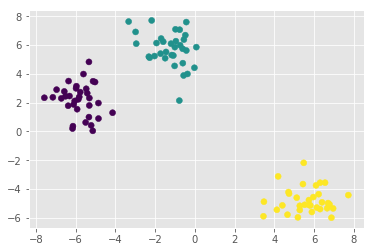

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

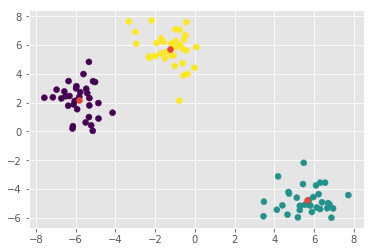

In [6]:
## Работоспособность MyKmeans
my_kmeans = MyKmeans(k=3)
my_kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=my_kmeans.predict(X))
plt.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1])

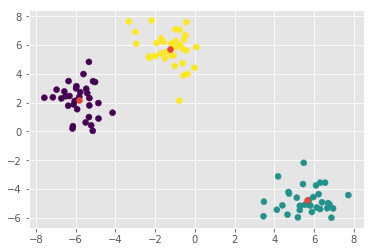

In [7]:
## Работоспособность MyKmeans++
my_kmeans = MyKmeans(k=3, init='k-means')
my_kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=my_kmeans.predict(X))
plt.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1])

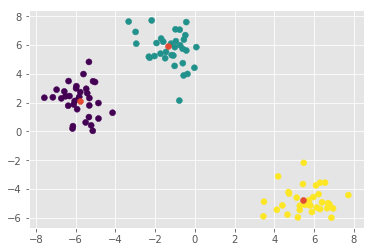

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
my_kmeans = MiniBatchKMeans(k=3)
my_kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=my_kmeans.predict(X))
plt.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1])

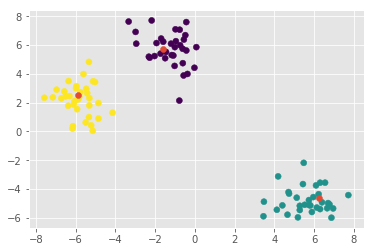

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
my_kmeans = MiniBatchKMeans(k=3, init='k-means')
my_kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=my_kmeans.predict(X))
plt.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1])

In [10]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
from time import time
start = time()
kmeans = KMeans(n_clusters=3, init='random', max_iter=1000,
                precompute_distances=False, n_init=1, tol=0)
kmeans.fit(X)
prediction = kmeans.predict(X)
end = time()
time = end - start
print("%.1fms" % (time * 1000))

351.8ms


In [11]:
## Время выполнения алгоритма MyKmeans
from time import time
start = time()
my_kmeans = MyKmeans(k=3)
my_kmeans.fit(X)
prediction = my_kmeans.predict(X)
end = time()
time = end - start
print("%.1fms" % (time * 1000))

5.0ms


In [12]:
## Время выполнения алгоритма MyKmeans++
from time import time
start = time()
my_kmeans = MyKmeans(k=3, init='k-means')
my_kmeans.fit(X)
prediction = my_kmeans.predict(X)
end = time()
time = end - start
print("%.1fms" % (time * 1000))

9.0ms


In [13]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
from time import time
my_kmeans = MiniBatchKMeans(k=3)
start = time()
my_kmeans.fit(X)
end = time()
prediction = my_kmeans.predict(X)
time = end - start
print("%.1fms" % (time * 1000))

7.0ms


In [14]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
from time import time
start = time()
my_kmeans = MiniBatchKMeans(k=3, init='k-means')
my_kmeans.fit(X)
prediction = my_kmeans.predict(X)
end = time()
time = end - start
print("%.1fms" % (time * 1000))

11.0ms


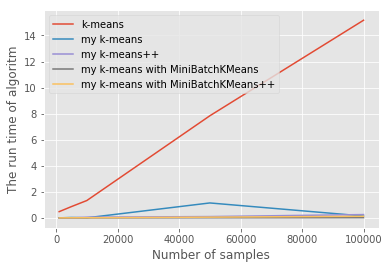

In [15]:
from time import time
from sklearn.cluster import KMeans
algorithms = (KMeans(n_clusters=3, init='random', max_iter=1000, n_init=1, tol=0),
              MyKmeans(k=3),
              MyKmeans(k=3, init='k-means'),
              MiniBatchKMeans(k=3),
              MiniBatchKMeans(k=3, init='k-means'))
labels = ("k-means", "my k-means", "my k-means++",
          "my k-means with MiniBatchKMeans",
          "my k-means with MiniBatchKMeans++")
samples = [1000, 5000, 10000, 50000, 100000]
times = np.empty((5, len(samples)))
for i, sample in enumerate(samples):
    X, y = make_blobs(n_samples=sample, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    for j, kmean in enumerate(algorithms):
        start = time()
        kmean.fit(X)
        end = time()
        times[j][i] = end - start
for i, kmean in enumerate(algorithms):
    plt.plot(samples, times[i], label=labels[i])
plt.xlabel('Number of samples')
plt.ylabel('The run time of algoritm')
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
df_sns = pd.read_csv('snsdata.csv', sep=',', error_bad_lines=False)
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [4]:
#Удаление всех признаков, кроме ключевых слов
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
#Нормализация данных: из каждого столбца вычитается его среднее значение и делится на стандартное отклонение
df_sns = (df_sns - df_sns.mean()) / df_sns.std()
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
1,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,1.067374,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
2,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,2.027874,-0.220399,-0.174905
3,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
4,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,2.273635,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,2.285084,2.719271


In [7]:
## MyKMeans
keywords = df_sns.columns
kmeans = MyKmeans(k=9)
kmeans.fit(df_sns.values)
for cluster, centroid in enumerate(kmeans.centroids):
    print("Cluster: ", cluster + 1)
    print("Number of students: ", kmeans.labels[kmeans.labels == cluster].size)
    print("Keywords: ", keywords[np.argsort(centroid)[-5:]].values, "\n")

Cluster:  1
Number of students:  847
Keywords:  ['clothes' 'mall' 'shopping' 'abercrombie' 'hollister'] 

Cluster:  2
Number of students:  1648
Keywords:  ['hair' 'cute' 'shopping' 'dance' 'dress'] 

Cluster:  3
Number of students:  497
Keywords:  ['rock' 'drugs' 'hair' 'sex' 'kissed'] 

Cluster:  4
Number of students:  2338
Keywords:  ['sports' 'softball' 'football' 'baseball' 'basketball'] 

Cluster:  5
Number of students:  746
Keywords:  ['swimming' 'rock' 'music' 'band' 'marching'] 

Cluster:  6
Number of students:  18910
Keywords:  ['bible' 'soccer' 'jesus' 'tennis' 'blonde'] 

Cluster:  7
Number of students:  3739
Keywords:  ['dance' 'hot' 'mall' 'cute' 'shopping'] 

Cluster:  8
Number of students:  453
Keywords:  ['death' 'church' 'god' 'jesus' 'bible'] 

Cluster:  9
Number of students:  822
Keywords:  ['death' 'hair' 'die' 'drugs' 'drunk'] 



Описание кластеров: $$$$
Cluster 1: Шопоголики.$$$$
Cluster 2: Девушки, любящие милоту, платьица и танцы.$$$$
Cluster 3: Люди, олицетворяющие фразу: "Секс, наркотики и рок-н-ролл".$$$$
Cluster 4: Спортсмены.$$$$
Cluster 5: Рок-музыканты, любящие плавать.$$$$
Cluster 6: Слишком большой кластер - плохо интерпретируется, в целом спорт + религия.$$$$
Cluster 7: Тусовщики.$$$$
Cluster 8: Верующие люди.$$$$
Cluster 9: Люди, которые как-то связаны с тяжёлыми болезнями.$$$$

In [9]:
## MyKMeans++
keywords = df_sns.columns
kmeans = MyKmeans(k=9, init="k-means")
kmeans.fit(df_sns.values)
for cluster, centroid in enumerate(kmeans.centroids):
    print("Cluster: ", cluster + 1)
    print("Number of students: ", kmeans.labels[kmeans.labels == cluster].size)
    print("Keywords: ", keywords[np.argsort(centroid)[-5:]].values, "\n")

Cluster:  1
Number of students:  2460
Keywords:  ['sports' 'baseball' 'football' 'softball' 'basketball'] 

Cluster:  2
Number of students:  947
Keywords:  ['drunk' 'sex' 'hair' 'drugs' 'kissed'] 

Cluster:  3
Number of students:  584
Keywords:  ['god' 'rock' 'music' 'band' 'marching'] 

Cluster:  4
Number of students:  244
Keywords:  ['basketball' 'soccer' 'church' 'sports' 'tennis'] 

Cluster:  5
Number of students:  835
Keywords:  ['clothes' 'mall' 'shopping' 'abercrombie' 'hollister'] 

Cluster:  6
Number of students:  1
Keywords:  ['hair' 'death' 'drunk' 'sex' 'blonde'] 

Cluster:  7
Number of students:  4479
Keywords:  ['church' 'mall' 'dance' 'cute' 'shopping'] 

Cluster:  8
Number of students:  644
Keywords:  ['mall' 'cute' 'football' 'shopping' 'cheerleading'] 

Cluster:  9
Number of students:  19806
Keywords:  ['drunk' 'death' 'bible' 'soccer' 'blonde'] 



Описание кластеров: $$$$
Cluster 1: Спортсмены.$$$$
Cluster 2: Люди, любящие секс, наркотики и выпивку.Тусовщики?$$$$
Cluster 3: Рок-музыканты.$$$$
Cluster 4: Спортсмены верующие (не очень большой кластер).$$$$
Cluster 5: Шопоголики.$$$$
Cluster 6: Слишком маленький кластер - плохо интерпретируется.$$$$
Cluster 7: Похоже, что просто девушки.$$$$
Cluster 8: Черлидерши.$$$$
Cluster 9: Слишком большой кластер - плохо интерпретируется, в целом спорт + религия.$$$$

In [8]:
## MyKMeans с MiniBatchMyKMeans
keywords = df_sns.columns
kmeans = MiniBatchKMeans(k=9)
kmeans.fit(df_sns.values)
for cluster, centroid in enumerate(kmeans.centroids):
    print("Cluster: ", cluster + 1)
    print("Number of students: ", kmeans.labels[kmeans.labels == cluster].size)
    print("Keywords: ", keywords[np.argsort(centroid)[-5:]].values, "\n")

Cluster:  1
Number of students:  19519
Keywords:  ['sex' 'blonde' 'abercrombie' 'sexy' 'bible'] 

Cluster:  2
Number of students:  193
Keywords:  ['mall' 'jesus' 'cute' 'clothes' 'drugs'] 

Cluster:  3
Number of students:  2960
Keywords:  ['rock' 'die' 'mall' 'clothes' 'shopping'] 

Cluster:  4
Number of students:  1395
Keywords:  ['jesus' 'shopping' 'sexy' 'drunk' 'church'] 

Cluster:  5
Number of students:  1902
Keywords:  ['death' 'jesus' 'band' 'volleyball' 'rock'] 

Cluster:  6
Number of students:  815
Keywords:  ['bible' 'blonde' 'music' 'band' 'marching'] 

Cluster:  7
Number of students:  417
Keywords:  ['mall' 'church' 'shopping' 'cheerleading' 'soccer'] 

Cluster:  8
Number of students:  394
Keywords:  ['drugs' 'abercrombie' 'cute' 'band' 'dance'] 

Cluster:  9
Number of students:  2405
Keywords:  ['bible' 'blonde' 'basketball' 'football' 'mall'] 



Описание кластеров: $$$$
Cluster 1: Слишком большой кластер - плохо интерпретируется, в целом секс + религия..$$$$
Cluster 2: Обычные девушки, если считать drugs лекарствами, а не наркотиками.$$$$
Cluster 3: Шопоголики, слушающие рок.$$$$
Cluster 4: Не знаю, как интерпретировать.$$$$
Cluster 5: Рок-музыканты, играющие в волейбол.$$$$
Cluster 6: Музыканты.$$$$
Cluster 7: Черлидерши.$$$$
Cluster 8: Не знаю, как интерпретировать.$$$$
Cluster 9: Спортсмены.$$$$

In [17]:
## MyKMeans++ с MiniBatchMyKMeans
keywords = df_sns.columns
kmeans = MiniBatchKMeans(k=9, init="k-means")
kmeans.fit(df_sns.values)
for cluster, centroid in enumerate(kmeans.centroids):
    print("Cluster: ", cluster + 1)
    print("Number of students: ", kmeans.labels[kmeans.labels == cluster].size)
    print("Keywords: ", keywords[np.argsort(centroid)[-5:]].values, "\n")

Cluster:  1
Number of students:  8069
Keywords:  ['clothes' 'sexy' 'drunk' 'church' 'dance'] 

Cluster:  2
Number of students:  18875
Keywords:  ['abercrombie' 'volleyball' 'soccer' 'god' 'sexy'] 

Cluster:  3
Number of students:  213
Keywords:  ['band' 'sex' 'mall' 'baseball' 'volleyball'] 

Cluster:  4
Number of students:  444
Keywords:  ['dance' 'cheerleading' 'cute' 'drugs' 'hair'] 

Cluster:  5
Number of students:  776
Keywords:  ['clothes' 'death' 'shopping' 'tennis' 'soccer'] 

Cluster:  6
Number of students:  195
Keywords:  ['soccer' 'death' 'drunk' 'sexy' 'hot'] 

Cluster:  7
Number of students:  72
Keywords:  ['church' 'football' 'shopping' 'sports' 'swimming'] 

Cluster:  8
Number of students:  128
Keywords:  ['rock' 'clothes' 'football' 'church' 'bible'] 

Cluster:  9
Number of students:  1228
Keywords:  ['dress' 'swimming' 'shopping' 'football' 'drugs'] 



Описание кластеров: $$$$
Cluster 1: Возможно, девушки.$$$$
Cluster 2: Слишком большой кластер - плохо интерпретируется, в целом спорт + секс + религия.$$$$
Cluster 3: Парни.$$$$
Cluster 4: Черлидерши, если считать drugs - лекарствами, а не наркотиками.$$$$
Cluster 5: Спортсмены-шопоголики.$$$$
Cluster 6: Тусовщики.$$$$
Cluster 7: Спортсмены.$$$$
Cluster 8: Верующие парни, слушающие рок и занимающиеся спортом.$$$$
Cluster 9: Спортсменки?$$$$

## Вывод
Все методы выдают примерно похожие кластеры.
Самые понятные для интерпретации K-means и K-means++.
MiniBatch K-means и MiniBatch K-means++ слишком сильно перемешивают кластеры и дают несколько слишком маленьких.
В итоге лучше и быстрей всех справился K-means.